# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [1]:
f = open('pushkin-metel.txt', "r", encoding="utf-8")
text = f.read()

In [2]:
type(text)

str

In [3]:
len(text)

22968

In [4]:
text[:300]

'Метель \n\n\nКони мчатся по буграм, \n\nТопчут снег глубокой \n\nВот, в сторонке божий храм \n\nВиден одинокой. \n\nВдруг метелица кругом; \n\nСнег валит клоками; \n\nЧерный вран, свистя крылом, \n\nВьется над санями; \n\nВещий стон гласит печаль! \n\nКони торопливы \n\nЧутко смотрят в темну даль, \n\nВоздымая гривы\n\n\xa0\xa0\xa0\xa0Жу'

## Предварительная обработка текста

In [5]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
type(string.punctuation)

str

In [8]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [9]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

CPU times: total: 0 ns
Wall time: 4 ms


In [10]:
import re
text = re.sub('\n', '', text)

In [11]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [12]:
%%time
text = remove_chars_from_text(text, spec_chars)

CPU times: total: 0 ns
Wall time: 3 ms


In [13]:
%%time
text = remove_chars_from_text(text, string.digits)

CPU times: total: 0 ns
Wall time: 3 ms


## Токенизация текста

In [15]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [16]:
print(type(text_tokens), len(text_tokens))
text_tokens[:10]

<class 'list'> 3402


['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

In [17]:
import nltk
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

## Расчёт частоты встречаемости слов

In [18]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: total: 0 ns
Wall time: 3 ms


FreqDist({'и': 146, 'в': 101, 'не': 69, 'что': 54, 'с': 44, 'он': 42, 'она': 39, 'ее': 39, 'на': 31, 'было': 27, ...})

In [19]:
fdist.most_common(5)

[('и', 146), ('в', 101), ('не', 69), ('что', 54), ('с', 44)]

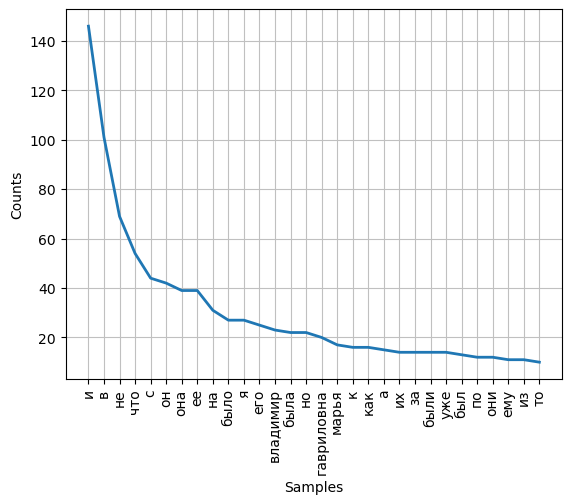

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
fdist.plot(30,cumulative=False)

## Удаление стоп-слов

In [21]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

In [22]:
print(len(russian_stopwords))
# russian_stopwords

153


In [23]:
%%time
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

CPU times: total: 0 ns
Wall time: 5 ms


In [24]:
print(len(text_tokens))

2158


In [25]:
text = nltk.Text(text_tokens)

In [26]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('владимир', 23),
 ('гавриловна', 20),
 ('марья', 17),
 ('поехал', 9),
 ('бурмин', 9),
 ('поминутно', 8),
 ('метель', 7),
 ('несколько', 6),
 ('сани', 6),
 ('владимира', 6)]

## Построение облака слов

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
text_raw = " ".join(text)

In [30]:
wordcloud = WordCloud().generate(text_raw)

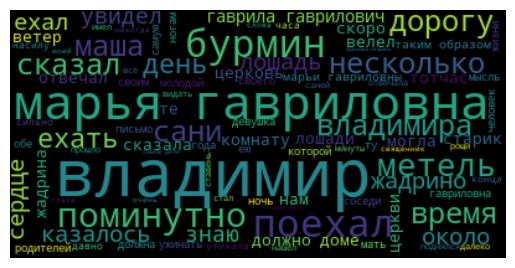

In [31]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()